Bayesian Regression
-----

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Abalone_at_California_Academy_of_Sciences.JPG/1200px-Abalone_at_California_Academy_of_Sciences.JPG" width="500"/></center>

You are hired by a humble abalone farmer. She is interested in conducting analysis to help her understand her beloved molluscs.

----
Data
----

Lucky for both of you there is historical data:

http://archive.ics.uci.edu/ml/datasets/Abalone?pagewanted=all

In [1]:
reset -fs

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
# Load data 
abalone = pd.read_csv('../data/abalone.csv')
abalone.head(n=1)

,sex,length,diameter,height,weight_whole,weight_shucked,viscera,shell,n_rings
0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15


__Part 1__:

Explore the linear relationship between length and diameter. Length is far easier to measure but diameter is more related to the amount of meat for sale.

__TODO__: Plot the relationship:

<br>
<details><summary>
Click here for a hint…
</summary>
Create a new DataFrame with generic names 'x' and 'y' for MCMC plotting
</details>

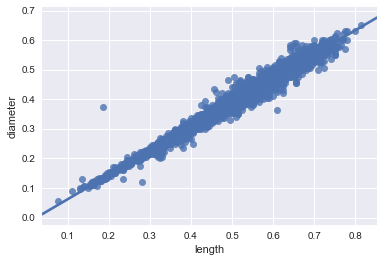

In [4]:
sns.regplot(abalone.length,abalone.diameter)

In [5]:
df = pd.DataFrame({'x':abalone.length,'y':abalone.diameter})

__TODO__: Use MCMC to find Bayesian regression estimates

<br>
<details><summary>
Click here for a hint…
</summary>
https://pymc-devs.github.io/pymc3/notebooks/GLM-robust.html
</details>

In [15]:
import pymc3 as pm
from pymc3 import Model, Normal, HalfNormal

In [14]:
pm.model(context())

TypeError: modelcontext() missing 1 required positional argument: 'model'

In [18]:
basic_model = Model() # TODO: Create instance of model class
with  basic_model:

    pm.glm.glm("y ~ x", # TODO: Define glm using the R / Patsy model syntax
               df, 
               family=pm.glm.families.Normal()) # Normal distribution for the likelihood

    # Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
    start = pm.find_MAP()

    # Use the No-U-Turn Sampler
    step = pm.NUTS()

    # Calculate the trace
    iterations = 5000
    trace = pm.sample(iterations, 
                    step, 
                    start,  
                    progressbar=True)

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


         Current function value: -11293.087028
         Iterations: 19
         Function evaluations: 45
         Gradient evaluations: 44


100%|██████████| 5000/5000 [01:19<00:00, 63.11it/s] 


-----

__TODO__: Plot the bayesian regression:

<br>
<details><summary>
Click here for a hint…
</summary>
pm.glm.plot_posterior_predictive
</details>

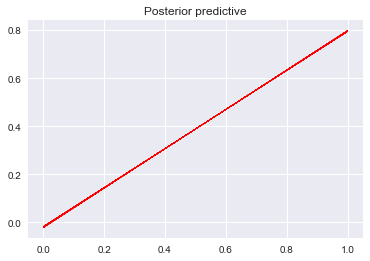

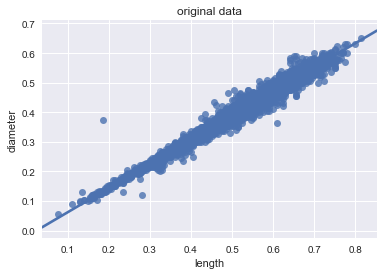

In [32]:
pm.glm.plot_posterior_predictive(trace[500:],samples=500, color='red') 
plt.figure()
sns.regplot(abalone.length,abalone.diameter)
plt.title('original data')
# remove the first 500 samples for the MCM 'burn in'

__TODO__: What can you could about the relationship? Does it makes sense to conduct a Bayesian Regression?


In [ ]:
# The relationship has very little uncertainity in it . All of the  samples drawn fall on the same regression line

----
Part 2: Repeat with two other variables 
-----

1. weight_shucked 
2. shell (weight)

She cares about weight_sucked whereas shell (weight) is a by-product.

In [22]:
df_2 = pd.DataFrame({'x':abalone.weight_shucked,'y':abalone.shell})

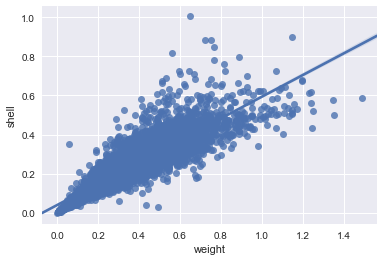

In [25]:
sns.regplot(df_2.x,df_2.y)
plt.xlabel('weight')
plt.ylabel('shell')

In [35]:
model = Model()
with model:
    pm.glm.glm("y~x", df_2,family=pm.glm.families.Normal())
     #Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
    start = pm.find_MAP()

    # Use the No-U-Turn Sampler
    step = pm.NUTS()

    # Calculate the trace
    iterations = 5000
    trace_2 = pm.sample(iterations, 
                    step, 
                    start,  
                    progressbar=True)

Optimization terminated successfully.
         Current function value: -5427.860086
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18

100%|██████████| 5000/5000 [00:23<00:00, 211.46it/s]

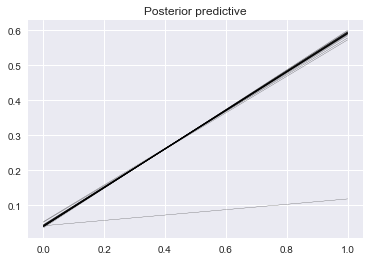

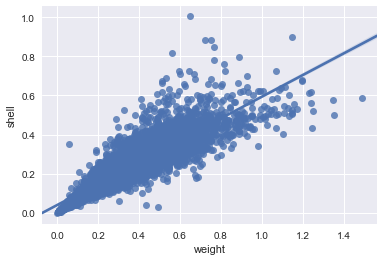

In [38]:
pm.glm.plot_posterior_predictive(trace_2[:200])
plt.figure()
sns.regplot(df_2.x,df_2.y)
plt.xlabel('weight')
plt.ylabel('shell')

__TODO__: What can you could about the relationship? Does it makes sense to conduct a Bayesian Regression?

In [ ]:
# If you have low noise, in your relationship then it probably does not make sense to use bayesian regression here
# it is easier to use simple OLS when you have a strong signal

In [41]:
def convertFracts(lst):
    # always needs to be a multiple of the largets deonminator 
    print(lst)
    final_list = []
    lcm = 1
   

    def gcd(num1,num2):
        # return gcm of the two numbers
        gcd_1 = 0
        denom_1 = max(num1,num2)
        denom_2 = min(num1,num2)
        if num1<10:
            denom_1 = num1*num2
 
        remainder = 99999
        while remainder != 0 :
            remainder = denom_1%denom_2
            if remainder == 0:
                gcd_1 = denom_2
                break
            denom_1 = denom_2
            denom_2 = remainder
            
            gcd_1 = denom_2
        if num1 <10:
        
            return abs(denom_1*denom_2)/gcd_1
        else:
             return abs(num1*num2)/gcd_1
           
    
    for idx in range(len(lst)-1):
        lcm_1 = gcd(lst[idx][1],lst[idx+1][1])

        if idx == 0 :
            lcm = lcm_1
        elif lcm_1%lcm !=0:
            lcm = int(gcd(lcm,lst[idx+1][1]))

        else:
              lcm = int(lcm_1)
        print(lcm,'lcm')
      

    print(lcm/lst[0][1] , 'multiple')
    final_list.append([[int(float(lcm)/float(num[1])*float(num[0])),int(lcm)] for num in lst])
    print(final_list)
    return final_list[0]

In [42]:
convertFracts([[27115, 5262], [87546, 11111111], [43216, 255689]])

[[27115, 5262], [87546, 11111111], [43216, 255689]]
58466666082.0 lcm
14949283383840498 lcm
2840988860479.0 multiple
[[[77033412951888080, 14949283383840498], [117787497858828, 14949283383840498], [2526695441399712, 14949283383840498]]]


[[77033412951888080, 14949283383840498],
 [117787497858828, 14949283383840498],
 [2526695441399712, 14949283383840498]]

In [47]:
int(14949283383840498/5262 * 27115)

77033412951888080

<br>
<br> 
<br>

----